# Задание 2.1, Панченко С.,674

Загрузим необходимые модули и модифицируем стиль графиков matplotlib.

In [5]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

mpl.style.use('seaborn')
plt.rc('font', size=15)
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['figure.figsize'] = (9.0, 9.0)

from statsmodels.stats.proportion import binom_test

Формализуем гипотезу и воспользуемся для её проверки модификацией двухвыборочного критерия знаков: достаточно в неравенстве $\mathbf{P}(X_1 > X_2) = \frac{1}{2}$ заменить $\frac{1}{2}$ на $\frac{1}{4}$ и учесть, что соответсвующим образом изменится распределение статистики.

$$\text{1.Выборки:}$$
$$X_1^{(n)}  = (X_{11}, ... , X_{1n}) = y$$
$$X_2^{(n)} = (X_{21}, ... , X_{2n}) = \hat{y}$$
$$X_{1i} \neq X_{2i} \text{, выборки связанные}$$ 

$$\text{2.Нулевая гипотеза:}$$
$$H_0: \mathbf{P}(X_1 > X_2) = \frac{1}{4}$$ 

$$\text{3.Альтернатива:}$$
$$H_1: \mathbf{P}(X_1 > X_2) \neq \frac{1}{4} \text{ (двусторонняя)}$$

$$\text{4.Статистика критерия:}$$
$$T(X_1^{(n)}, X_2^{(n)}) = \sum_{i = 1}^n [X_{1i} > X_{2i}]$$

$$\text{5.Распределение статистики в условии истинности }H_0:$$
$$T \text{ ~ } Bin(n, \frac{1}{4})$$

Найдем зависимость мощности описанного критерия от истинного процента заниженных ответов, долю которых обозначим $p$. 
Пусть зафиксировано значение ошибки первого рода $\alpha = 0.05$. На основе заданного значения $n$ формируется двусторонняя критическая область значений статистики $U_{крит}$. Тогда мощность - это вероятность попадания в критическую область в условии истинности альтернативы $H_1$.
Попадание в критическую область в терминах p-value означает превышение порога alpha.
Вероятность попадания в критическую область будет оценивать сэмплированием $500$ выборок для каждого значения $p$ при 2-ух фиксированных объемах выборкок: $n = 100$ и $n = 1000$.

In [17]:
p_array = np.linspace(0, 1, 101)
n = 100
sample_count = 500
powers = np.zeros(101)
alpha = 0.05

for i, p in enumerate(p_array):
    power = 0
    for j in range(sample_count):
        sample = np.random.binomial(n, p)
        p_value = binom_test(sample, n, prop = 0.25, alternative = 'two-sided')
        if p_value <= alpha:
            power += 1/sample_count
    powers[i] = power

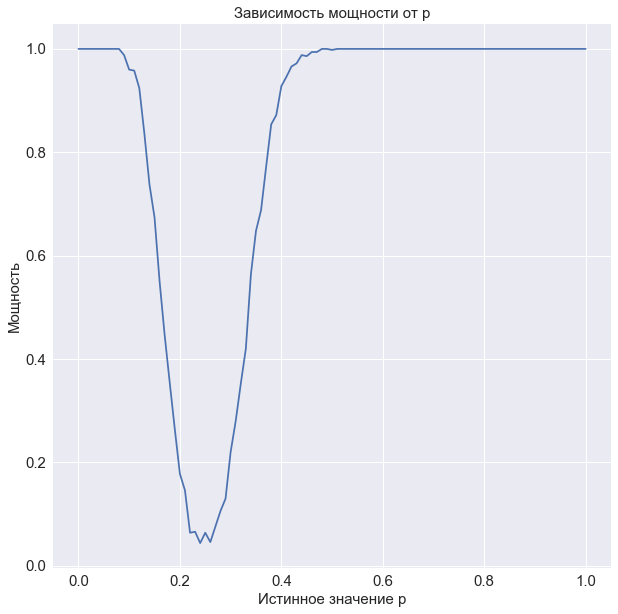

In [18]:
plt.figure(figsize = (10, 10))
plt.plot(p_array, powers)
plt.xlabel('Истинное значение p')
plt.ylabel('Мощность')
plt.title('Зависимость мощности от p')
plt.show()

In [19]:
p_array = np.linspace(0, 1, 101)
n = 1000
sample_count = 500
powers = np.zeros(101)
alpha = 0.05

for i, p in enumerate(p_array):
    power = 0
    for j in range(sample_count):
        sample = np.random.binomial(n, p)
        p_value = binom_test(sample, n, prop = 0.25, alternative = 'two-sided')
        if p_value <= alpha:
            power += 1/sample_count
    powers[i] = power

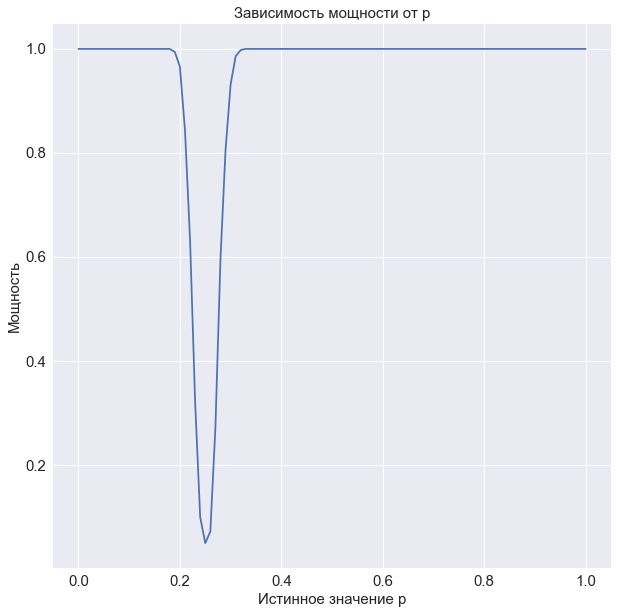

In [20]:
plt.figure(figsize = (10, 10))
plt.plot(p_array, powers)
plt.xlabel('Истинное значение p')
plt.ylabel('Мощность')
plt.title('Зависимость мощности от p')
plt.show()

Вывод: при истинном значении $p$, достаточно удалённом от 0.25, даже при небольших n критерий имеет мощность, близкую к единице, т.е. прекрасно отделяет истинную альтернативу от предполагаемой гипотезы. При этом область значений $p$, где мощность мала, сужается с ростом $n$.